<h1><center>What the Data Really Says About Magic the Gathering</center></h1>
<h2><center>What is Magic the Gathering?</center></h2>
<p>
    &emsp;Magic the gathering is a popular trading card game that was originally developed in 1993 by Richard Garfield. It is one of the most popular trading card games world wide, and has been pleasing fans of the trading card game genre for years. In the game of Magic the Gathering, you and your opponent construct a deck of 60 cards containing a variety of fearsome spells. Each player begins a game with 20 life points, and the first player who is able to reduce their opponent's life to 0 is the victor. Follow the link <a href="https://magic.wizards.com/en/intro">here</a> if you are interested in learning more about this popular game.
</p>
<h2><center>What Can Data Science Teach Us About MTG?</center></h2>
<p>
    &emsp;In theory, the game of Magic the Gathering is divided into five distinct color groups. Each color supposedly offers a variety of cards that can do things the other colors cannot. This division is often referred to the <a href="https://mtg.fandom.com/wiki/Color#:~:text=The%20color%20pie%20is%20portrayed,form%20of%20round%20colored%20gems.">color pie</a> by fans of the franchise. For instance, the color green in Magic the Gathering is associated with "nature, wildlife, connection, spirituality, tradition," and as a consequence one of the mechanics of green cards is that they are expected to have the largest and most powerful creatures when it comes to pure strength. In contrast, the color red in Magic the Gathering is associated with "freedom, emotion, action, impulse, destruction," and its creature cards tend to be cheap, fast, and aggressive for early attacks. One of the objectives of this data analysis is to discover if the color pie holds true when we begin to analyze the attributes of cards.
</p>
<h2><center>The Financial Side of MTG</center></h2>
<p>
&emsp;The world of MTG is not limited to those who merely love to play the game. In fact the game has become so popular, that the secondary market for purchasing and selling Magic cards has become a mini game of its own. You can think of the finance side of Magic the Gathering as something similar to the stock exchange, but with far less regulation. One popular website largely dedicated to monitoring these price trends is known as <a href="https://www.mtggoldfish.com/mtggoldfish">mtggoldfish</a>, and you can check out this site if you are interested in learning more about this side of the game. So, one of the natural questions I had was what could be a predictor of a card's value so that I could determine what cards could potentially be worth more in the future. One of the basic principles in finance is the relationship between <a href="https://www.investopedia.com/ask/answers/040215/how-does-law-supply-and-demand-affect-stock-market.asp#:~:text=The%20law%20of%20supply%20and%20demand%20seeks%20to%20explain%20the,influence%20the%20demand%20for%20stocks.">supply and demand</a>. A quick summary of this concept is that supply is negatively correlated to price, meaning that as supply increases price decreases, and demand is positively correlated to price, meaning that as demand increases price increases. These princples of supply and demand can often be observed in real time in the MTG Finance world. For instance, when a specific deck becomes popular, cards contained in that deck tend to increase in price as their demand increases and available supply decreases, and when the deck inevitably gets replaced, those same cards will fall in price as demand decreases and available supply increases. In this research project, I will restrict my focus to the specific attributes of the cards themselves for predicting price rathering than popularity trends because I found this type of data much more difficult to quanitify in an analysis.
</p>
<h1><center>Collecting and Cleaning My Data</center></h1>
<p>
&emsp;While there were many sources to choose from for this research project, I ultimately decided to use <a href="https://mtgjson.com/">mtgjson</a> for my data. This site contained info on all the cards released in Magic's history, as well as a limited set of data describing these cards' price history in the last few months. However, this data wasn't perfect and you can follow along from here for how I cleaned this data into a format that felt useable. The two datasets I downloaded from this website were the 'AllPrintings.json' file containing info about the cards attributes from a game perspective, and the 'AllPrices.json' file containing info about a card's price history over the last few months.
</p>
<h2><center>Parsing 'AllPrintings.json'</center></h2>
<p>
&emsp;To start, I began with the 'AllPrintings.json' file. The first step I took was creating a dictionary that would hold all the attributes I felt would be useful in this analysis, and then I loaded the json file as a json object and parsed through the file's attributes by set. I also created a separate dictionary that would hold data unique to creature cards in this file because I was specifically interested in analyzing the attributes of creatures. These dictionaries would then be converted to panda's dataframe objects for data analysis. One of the biggest challenges of working with these json files was extracting only the necessary information. The json files themselves are complicated, and much of the data is stored in a fashion that makes it difficult to use, being nested under many many keys. This makes loading the json file as a dataframe directly extremely difficult to work with. 
</p>
<p>
&emsp;Parsing through the card's fields, I discovered my first hiccup in the dataset. Not all cards seemed to share the same base attributes, so when failing to find a common feature, I handled these exceptions with "try except" blocks and manually inserted the NaN value for indicating missing data. In the grand scheme of this project, those cards with missing fields were the exception to the rule, and these missing values are largely ignored later on.
</p>

In [1]:
import json as js
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
f = open('AllPrintings.json', encoding="utf8") 
all_p = js.load(f)

In [3]:
# uuid, setcode, name, colors, manaValue, types, rarity, legal_in_modern, hasFoil, hasNonFoil, artist, num_printings,
# power, toughness
my_dict = {
    'uuid': [],
    'setcode': [],
    'name': [],
    'is_W': [],
    'is_U': [],
    'is_B': [],
    'is_R': [],
    'is_G': [],
    'is_C': [],
    'manaValue': [],
    'is_Artifact': [],
    'is_Creature': [],
    'is_Instant': [],
    'is_Sorcery': [],
    'is_Planeswalker': [],
    'is_Land': [],
    'is_Enchantment': [],
    'rarity': [],
    'legal_in_modern': [],
    'hasFoil': [],
    'hasNonFoil': [],
    'artist': [],
    'num_printings': [],
    'release_date': []
}

my_creature_dict = {
    'uuid': [],
    'setcode': [],           
    'name': [],
    'is_W': [],
    'is_U': [],
    'is_B': [],
    'is_R': [],
    'is_G': [],
    'is_C': [],
    'manaValue': [],
    'rarity': [],
    'legal_in_modern': [],
    'hasFoil': [],
    'hasNonFoil': [],
    'artist': [],
    'num_printings': [],
    'power': [],
    'toughness': [],
    'release_date': []
}

sets = all_p['data'].keys()
for s in sets:
    cards = all_p['data'][s]['cards']
    for card in cards:
        my_dict['uuid'].append(card['uuid'])
        my_dict['setcode'].append(card['setCode'])
        my_dict['name'].append(card['name'])
    
        # adding cards colors
        my_dict['is_W'].append(card['colors'].count('W') > 0)
        my_dict['is_U'].append(card['colors'].count('U') > 0)
        my_dict['is_B'].append(card['colors'].count('B') > 0)
        my_dict['is_R'].append(card['colors'].count('R') > 0)
        my_dict['is_G'].append(card['colors'].count('G') > 0)
        my_dict['is_C'].append(len(card['colors']) == 0)

        my_dict['manaValue'].append(card['manaValue'])

        # adding cards types
        my_dict['is_Artifact'].append(card['types'].count('Artifact') > 0)
        my_dict['is_Creature'].append(card['types'].count('Creature') > 0)
        my_dict['is_Instant'].append(card['types'].count('Instant') > 0)
        my_dict['is_Sorcery'].append(card['types'].count('Sorcery') > 0)
        my_dict['is_Planeswalker'].append(card['types'].count('Planeswalker') > 0)
        my_dict['is_Land'].append(card['types'].count('Land') > 0)
        my_dict['is_Enchantment'].append(card['types'].count('Enchantment') > 0)

        my_dict['rarity'].append(card['rarity'])
        try:
            my_dict['legal_in_modern'].append(card['legalities']['modern'] == 'Legal')
        except:
            my_dict['legal_in_modern'].append(np.NaN)
        my_dict['hasFoil'].append(card['hasFoil'])
        my_dict['hasNonFoil'].append(card['hasNonFoil'])
        try:
            my_dict['artist'].append(card['artist'])
        except:
            my_dict['artist'].append(np.NaN)
        my_dict['num_printings'].append(len(card['printings']))

        my_dict['release_date'].append(all_p['data'][s]['releaseDate'])
        
        if card['types'].count('Creature') > 0:
            my_creature_dict['uuid'].append(card['uuid'])
            my_creature_dict['setcode'].append(card['setCode'])
            my_creature_dict['name'].append(card['name'])

            # adding cards colors
            my_creature_dict['is_W'].append(card['colors'].count('W') > 0)
            my_creature_dict['is_U'].append(card['colors'].count('U') > 0)
            my_creature_dict['is_B'].append(card['colors'].count('B') > 0)
            my_creature_dict['is_R'].append(card['colors'].count('R') > 0)
            my_creature_dict['is_G'].append(card['colors'].count('G') > 0)
            my_creature_dict['is_C'].append(len(card['colors']) == 0)

            my_creature_dict['manaValue'].append(card['manaValue'])

            my_creature_dict['rarity'].append(card['rarity'])
            try:
                my_creature_dict['legal_in_modern'].append(card['legalities']['modern'] == 'Legal')
            except:
                my_creature_dict['legal_in_modern'].append(np.NaN)
            my_creature_dict['hasFoil'].append(card['hasFoil'])
            my_creature_dict['hasNonFoil'].append(card['hasNonFoil'])
            try:
                my_creature_dict['artist'].append(card['artist'])
            except:
                my_creature_dict['artist'].append(np.NaN)
            my_creature_dict['num_printings'].append(len(card['printings']))

            my_creature_dict['release_date'].append(all_p['data'][s]['releaseDate'])
            
            #adding power and toughness
            try:
                my_creature_dict['power'].append(card['power'])
            except:
                my_creature_dict['power'].append(np.NaN)
            try:
                my_creature_dict['toughness'].append(card['toughness'])
            except:
                my_creature_dict['toughness'].append(np.NaN)
            
    
general_df = pd.DataFrame(my_dict)
general_df.head()

,uuid,setcode,name,is_W,is_U,is_B,is_R,is_G,is_C,manaValue,...,is_Planeswalker,is_Land,is_Enchantment,rarity,legal_in_modern,hasFoil,hasNonFoil,artist,num_printings,release_date
0,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,10E,Ancestor's Chosen,True,False,False,False,False,False,7.0,...,False,False,False,uncommon,True,False,True,Pete Venters,3,2007-07-13
1,b7c19924-b4bf-56fc-aa73-f586e940bd42,10E,Ancestor's Chosen,True,False,False,False,False,False,7.0,...,False,False,False,uncommon,True,True,False,Pete Venters,3,2007-07-13
2,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,10E,Angel of Mercy,True,False,False,False,False,False,5.0,...,False,False,False,uncommon,True,False,True,Volkan Baǵa,13,2007-07-13
3,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,10E,Angel of Mercy,True,False,False,False,False,False,5.0,...,False,False,False,uncommon,True,True,False,Volkan Baǵa,13,2007-07-13
4,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,10E,Angelic Blessing,True,False,False,False,False,False,3.0,...,False,False,False,common,True,False,True,Mark Zug,9,2007-07-13


In [4]:
creature_df = pd.DataFrame(my_creature_dict)
creature_df.head()

,uuid,setcode,name,is_W,is_U,is_B,is_R,is_G,is_C,manaValue,rarity,legal_in_modern,hasFoil,hasNonFoil,artist,num_printings,power,toughness,release_date
0,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,10E,Ancestor's Chosen,True,False,False,False,False,False,7.0,uncommon,True,False,True,Pete Venters,3,4,4,2007-07-13
1,b7c19924-b4bf-56fc-aa73-f586e940bd42,10E,Ancestor's Chosen,True,False,False,False,False,False,7.0,uncommon,True,True,False,Pete Venters,3,4,4,2007-07-13
2,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,10E,Angel of Mercy,True,False,False,False,False,False,5.0,uncommon,True,False,True,Volkan Baǵa,13,3,3,2007-07-13
3,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,10E,Angel of Mercy,True,False,False,False,False,False,5.0,uncommon,True,True,False,Volkan Baǵa,13,3,3,2007-07-13
4,fadda48c-6226-5ac5-a2b9-e9170d2017cd,10E,Angelic Wall,True,False,False,False,False,False,2.0,common,True,False,True,John Avon,5,0,4,2007-07-13


<h2><center>Parsing 'AllPrices.json'</center></h2>
<p>
&emsp;I took a very similar approach to parsing the 'AllPrices.json'. Similarly above, some cards seemed to have missing attributes that were common among all other cards, and I simply caught these exceptions and handled it by inserting NaN for these values to indicate missing values.
</p>

In [5]:
f = open('AllPrices.json', encoding="utf8") 
all_prices = js.load(f)

In [6]:
# Create new dataframe with uuid and max price for data we have
my_dict_prices = {'uuid': [],
                  'nonfoil_price': [],
                  'foil_price': []
                 }

uuids = general_df['uuid']
for i in range(len(uuids)):
    my_dict_prices['uuid'].append(uuids[i])
    
    # Add non foil price or NaN if not available
    try:
        my_dict_prices['nonfoil_price'].append(max(all_prices['data'][uuids[i]]['paper']['tcgplayer']['buylist']['normal'].values()))
    except:
        my_dict_prices['nonfoil_price'].append(np.NaN)
     
    # Add foil price or NaN if not available
    try:
        my_dict_prices['foil_price'].append(max(all_prices['data'][uuids[i]]['paper']['tcgplayer']['buylist']['foil'].values()))
    except:
        my_dict_prices['foil_price'].append(np.NaN)
        
price_df = pd.DataFrame(my_dict_prices)
price_df.head()

,uuid,nonfoil_price,foil_price
0,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN,0.01
1,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN,0.01
2,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,NaN,0.59
3,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN,0.59
4,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,0.02,0.02


<h2><center>Combining the Datasets</center></h2>
<p>
&emsp;MTG json has luckily marked each card in its dataset with a unique id named uuid. Using this as the key, I was able to merge the two datasets together so that I now had one dataframe containing all the card's attributes and price information. I chose to do a left join, meaning that only cards with information about its game attributes are kept. It would not be very useful to have entries where the only data was a price point because there would be no attributes to explain those prices. It was also here that I took the opportunity to convert the release_date column to the datetime type which would help my analysis later on.
</p>

In [ ]:
combined = general_df.merge(price_df, how='left', on='uuid')
combined_creatures = creature_df.merge(price_df, how='left', on='uuid')
combined['release_date'] = combined['release_date'].apply(lambda x: pd.to_datetime(x))
combined_creatures['release_date'] = combined_creatures['release_date'].apply(lambda x: pd.to_datetime(x))

<h2><center>Joke Sets</center></h2>
<p>
&emsp;MTG has also had several joke sets created over the years. These cards are not legal in standard Magic the Gathering games and tend to do wild and wacky things. If you're interested in learning more about MTG's joke sets, check out this link <a href="https://draftsim.com/un-sets-mtg/">here</a>. Due to these card's crazy attributes, they will be dropped from the analysis as they can skew the data in some absurd ways.
</p>

In [9]:
# Drop all joke sets 
# UGL UND UNF UNH UST
combined = combined[combined['setcode'].apply(lambda x: not (x == 'UGL' or 
                                                              x == 'UND' or 
                                                              x == 'UNF' or 
                                                              x == 'UNH' or
                                                              x == 'UST'))]
combined_creatures = combined_creatures[combined_creatures['setcode'].apply(lambda x: not (x == 'UGL' or 
                                                                                 x == 'UND' or 
                                                                                 x == 'UNF' or 
                                                                                 x == 'UNH' or
                                                                                 x == 'UST'))]

<h1><center>Exploratory Data Analysis, and Hypothesis Testing</center></h1>
<p>
&emsp;The first thing I was interested in exploring was the validity of the color pie. I felt the best way to do this was by analyzing creatures of varying colors, and looking at how their power and toughness scales with their mana value. If you are unfamiliar with these terms, a creature's power determines how much damage it can output, a creature's toughness is how much damage it can take before being destroyed, and a creature's mana value is how much you have to pay to use that card. Before actually performing this analysis, I expected green creatures to have the best power and toughness for their cost (as players have been led to believe), and that red creatures would have better power for a cheap cost to act as aggressive creatures.
</p>
<p>
&emsp;In order to do this, I take the creatures table from above, and I remove any non numeric power and toughness from the data. These are often power and toughness indicated by an "x" or a "*" which is used as a wild card that scales with other conditions in the game. Then I convert these columns to numeric types, and add a new column pt which records the combined power and toughness.
</p>

In [10]:
df4 = combined_creatures.copy()
df4 = df4[df4['power'].apply(lambda x: x.isnumeric())]
df4 = df4[df4['toughness'].apply(lambda x: x.isnumeric())]
df4['power'] = pd.to_numeric(df4['power'])
df4['toughness'] = pd.to_numeric(df4['toughness'])
df4['pt'] = df4['power'] + df4['toughness']

<h2><center>Creating Graphs and Performing Linear Regression</center></h2>
<p>
&emsp;In order to create useful visualizations, I decided to create scatter plots and group them by the colors (white, blue, black, red, green, and colorless). On the x-axis, I measure a cards mana value and on the y-axis I measure the power, toughness, and combined power and toughness. Then for each of these scatter plots and groupings I fit a line with NumPy's polyfit function. I also extract the slope for each of these lines of best fit to get a better understanding of how power, toughness, and combined power and toughness scale for each of the colors as mana value increases.
</p>

Average increase in power per mana for white creatures is 0.6242556794025156 and intercept is 0.29123072471103023
Average increase in power per mana for blue creatures is 0.7651716498300911 and intercept is -0.36880663922891616
Average increase in power per mana for black creatures is 0.7159357517033318 and intercept is 0.17653749826689014
Average increase in power per mana for red creatures is 0.7661170971220768 and intercept is 0.08714201111033441
Average increase in power per mana for green creatures is 0.8506911842810349 and intercept is -0.2732498107970732
Average increase in power per mana for colorless creatures is 0.820543586111021 and intercept is -0.5078846936354284
Average increase in toughness per mana for white creatures is 0.7198434471402937 and intercept is 0.32439813135454587
Average increase in toughness per mana for blue creatures is 0.7185485749044499 and intercept is 0.30559732030715325
Average increase in toughness per mana for black creatures is 0.7013092986846683

Text(0, 0.5, 'Combined Power Tougness')

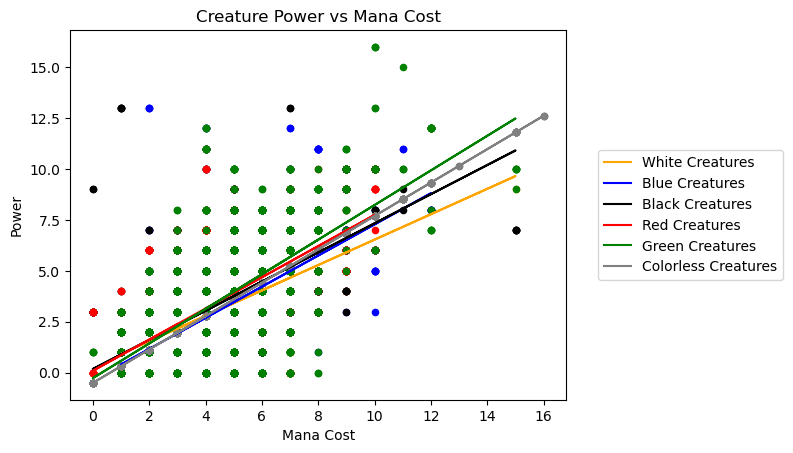

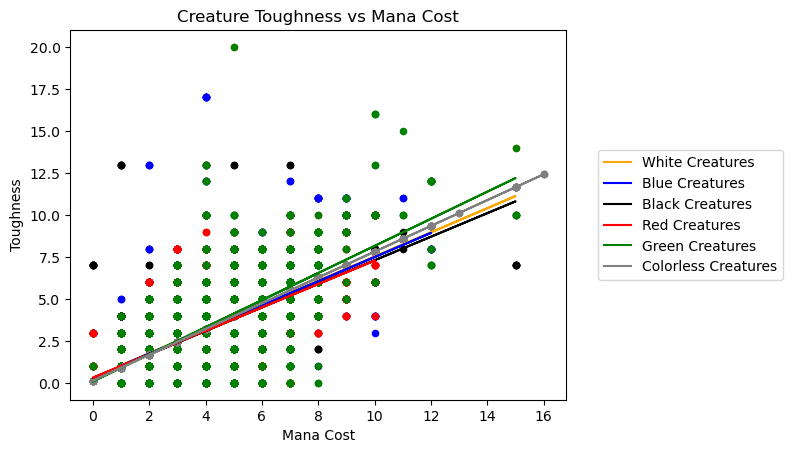

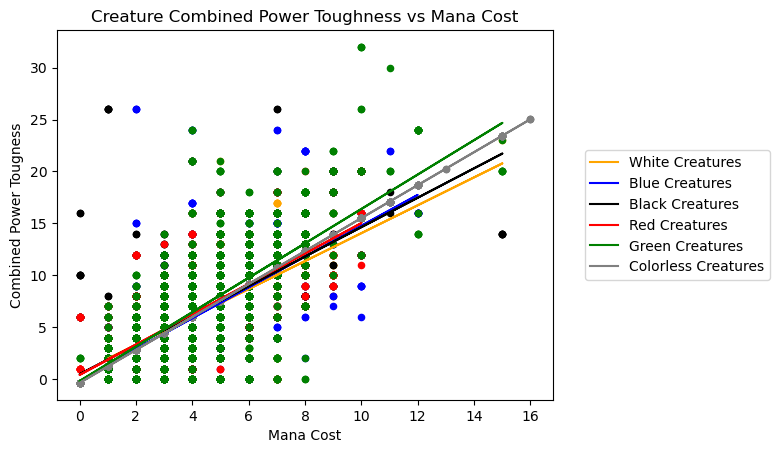

In [11]:
# fit lines to these scatter plots to determine how power scales with cmc for each color
white = df4[df4['is_W']].copy()
f = np.polyfit(white['manaValue'], white['power'], 1)
print("Average increase in power per mana for white creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
white['best_fit'] = (np.poly1d(f))(white['manaValue'])
ax1 = white.plot.line(x='manaValue', y='best_fit', color='orange')

blue = df4[df4['is_U']].copy()
f = np.polyfit(blue['manaValue'], blue['power'], 1)
print("Average increase in power per mana for blue creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
blue['best_fit'] = (np.poly1d(f))(blue['manaValue'])
blue.plot.line(x='manaValue', y='best_fit', color='blue', ax=ax1)

black = df4[df4['is_B']].copy()
f = np.polyfit(black['manaValue'], black['power'], 1)
print("Average increase in power per mana for black creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
black['best_fit'] = (np.poly1d(f))(black['manaValue'])
black.plot.line(x='manaValue', y='best_fit', color='black', ax=ax1)

red = df4[df4['is_R']].copy()
f = np.polyfit(red['manaValue'], red['power'], 1)
print("Average increase in power per mana for red creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
red['best_fit'] = (np.poly1d(f))(red['manaValue'])
red.plot.line(x='manaValue', y='best_fit', color='red', ax=ax1)

green = df4[df4['is_G']].copy()
f = np.polyfit(green['manaValue'], green['power'], 1)
print("Average increase in power per mana for green creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
green['best_fit'] = (np.poly1d(f))(green['manaValue'])
green.plot.line(x='manaValue', y='best_fit', color='green', ax=ax1)

colorless = df4[df4['is_C']].copy()
f = np.polyfit(colorless['manaValue'], colorless['power'], 1)
print("Average increase in power per mana for colorless creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
colorless['best_fit'] = (np.poly1d(f))(colorless['manaValue'])
colorless.plot.line(x='manaValue', y='best_fit', color='grey', ax=ax1)

white.plot.scatter(x='manaValue', y='power', color='orange', ax=ax1)
blue.plot.scatter(x='manaValue', y='power', color='blue', ax=ax1)
black.plot.scatter(x='manaValue', y='power', color='black', ax=ax1)
red.plot.scatter(x='manaValue', y='power', color='red', ax=ax1)
green.plot.scatter(x='manaValue', y='power', color='green', ax=ax1)
colorless.plot.scatter(x='manaValue', y='best_fit', color='grey', ax=ax1)
ax1.legend(["White Creatures", "Blue Creatures", "Black Creatures", "Red Creatures", "Green Creatures", "Colorless Creatures"], loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.set_title("Creature Power vs Mana Cost")
ax1.set_xlabel("Mana Cost")
ax1.set_ylabel("Power")

# fit lines to these scatter plots to determine how toughness scales with cmc for each color
white = df4[df4['is_W']].copy()
f = np.polyfit(white['manaValue'], white['toughness'], 1)
print("Average increase in toughness per mana for white creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
white['best_fit'] = (np.poly1d(f))(white['manaValue'])
ax2 = white.plot.line(x='manaValue', y='best_fit', color='orange')

blue = df4[df4['is_U']].copy()
f = np.polyfit(blue['manaValue'], blue['toughness'], 1)
print("Average increase in toughness per mana for blue creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
blue['best_fit'] = (np.poly1d(f))(blue['manaValue'])
blue.plot.line(x='manaValue', y='best_fit', color='blue', ax=ax2)

black = df4[df4['is_B']].copy()
f = np.polyfit(black['manaValue'], black['toughness'], 1)
print("Average increase in toughness per mana for black creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
black['best_fit'] = (np.poly1d(f))(black['manaValue'])
black.plot.line(x='manaValue', y='best_fit', color='black', ax=ax2)

red = df4[df4['is_R']].copy()
f = np.polyfit(red['manaValue'], red['toughness'], 1)
print("Average increase in toughness per mana for red creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
red['best_fit'] = (np.poly1d(f))(red['manaValue'])
red.plot.line(x='manaValue', y='best_fit', color='red', ax=ax2)

green = df4[df4['is_G']].copy()
f = np.polyfit(green['manaValue'], green['toughness'], 1)
print("Average increase in toughness per mana for green creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
green['best_fit'] = (np.poly1d(f))(green['manaValue'])
green.plot.line(x='manaValue', y='best_fit', color='green', ax=ax2)

colorless = df4[df4['is_C']].copy()
f = np.polyfit(colorless['manaValue'], colorless['toughness'], 1)
print("Average increase in toughness per mana for colorless creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
colorless['best_fit'] = (np.poly1d(f))(colorless['manaValue'])
colorless.plot.line(x='manaValue', y='best_fit', color='grey', ax=ax2)

white.plot.scatter(x='manaValue', y='toughness', color='orange', ax=ax2)
blue.plot.scatter(x='manaValue', y='toughness', color='blue', ax=ax2)
black.plot.scatter(x='manaValue', y='toughness', color='black', ax=ax2)
red.plot.scatter(x='manaValue', y='toughness', color='red', ax=ax2)
green.plot.scatter(x='manaValue', y='toughness', color='green', ax=ax2)
colorless.plot.scatter(x='manaValue', y='best_fit', color='grey', ax=ax2)
ax2.legend(["White Creatures", "Blue Creatures", "Black Creatures", "Red Creatures", "Green Creatures", "Colorless Creatures"], loc='center left', bbox_to_anchor=(1.05, 0.5))
ax2.set_title("Creature Toughness vs Mana Cost")
ax2.set_xlabel("Mana Cost")
ax2.set_ylabel("Toughness")

# fit lines to these scatter plots to determine how pt scales with cmc for each color
white = df4[df4['is_W']].copy()
f = np.polyfit(white['manaValue'], white['pt'], 1)
print("Average increase in combined the power toughness per mana for white creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
white['best_fit'] = (np.poly1d(f))(white['manaValue'])
ax3 = white.plot.line(x='manaValue', y='best_fit', color='orange')

blue = df4[df4['is_U']].copy()
f = np.polyfit(blue['manaValue'], blue['pt'], 1)
print("Average increase in the combined power toughness per mana for blue creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
blue['best_fit'] = (np.poly1d(f))(blue['manaValue'])
blue.plot.line(x='manaValue', y='best_fit', color='blue', ax=ax3)

black = df4[df4['is_B']].copy()
f = np.polyfit(black['manaValue'], black['pt'], 1)
print("Average increase in the combined power toughness per mana for black creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
black['best_fit'] = (np.poly1d(f))(black['manaValue'])
black.plot.line(x='manaValue', y='best_fit', color='black', ax=ax3)

red = df4[df4['is_R']].copy()
f = np.polyfit(red['manaValue'], red['pt'], 1)
print("Average increase in the combined power toughness per mana for red creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
red['best_fit'] = (np.poly1d(f))(red['manaValue'])
red.plot.line(x='manaValue', y='best_fit', color='red', ax=ax3)

green = df4[df4['is_G']].copy()
f = np.polyfit(green['manaValue'], green['pt'], 1)
print("Average increase in the combined power toughness per mana for green creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
green['best_fit'] = (np.poly1d(f))(green['manaValue'])
green.plot.line(x='manaValue', y='best_fit', color='green', ax=ax3)

colorless = df4[df4['is_C']].copy()
f = np.polyfit(colorless['manaValue'], colorless['pt'], 1)
print("Average increase in the combined power toughness per mana for colorless creatures is " + str(f[0]) + " and intercept is "+ str(f[1]))
colorless['best_fit'] = (np.poly1d(f))(colorless['manaValue'])
colorless.plot.line(x='manaValue', y='best_fit', color='grey', ax=ax3)

white.plot.scatter(x='manaValue', y='pt', color='orange', ax=ax3)
blue.plot.scatter(x='manaValue', y='pt', color='blue', ax=ax3)
black.plot.scatter(x='manaValue', y='pt', color='black', ax=ax3)
red.plot.scatter(x='manaValue', y='pt', color='red', ax=ax3)
green.plot.scatter(x='manaValue', y='pt', color='green', ax=ax3)
colorless.plot.scatter(x='manaValue', y='best_fit', color='grey', ax=ax3)
ax3.legend(["White Creatures", "Blue Creatures", "Black Creatures", "Red Creatures", "Green Creatures", "Colorless Creatures"], loc='center left', bbox_to_anchor=(1.05, 0.5))
ax3.set_title("Creature Combined Power Toughness vs Mana Cost")
ax3.set_xlabel("Mana Cost")
ax3.set_ylabel("Combined Power Tougness")

<h2><center>Reflections on Power, Toughness, and combined Power and Toughness Graphs</center></h2>
<p>
&emsp;The first thing I noticed is that green creatures seemed to have the most efficient slopes in terms of power, toughness, and combined power and toughness out of all the colors as expected. What was a little unexpected is just how close all of the colors are to each other. So, while there are some slight indications that green has the best creatures in terms of power and toughness, their creatures are not significantly better than the other colors.
</p>
<p>
&emsp;When looking at red creatures, I had expected the graph for power vs mana value to be much more skewed in red's favor. Red is expected to have the most efficient attacking creatures, meaning that they will often have lower toughness in exchange for more power, but the above graphs tell a different story. It was interesting to see that red falls into second place when looking at power per mana according to the linear regression lines, losing to the champion of creatures green. This had been a surprising discovery to me, as I expected red to be the victor by far in that graph.
</p>

<h2><center>MTG Financial Factors, Data Visualization and Hypothesis Testing</center></h2>
<p>
&emsp;For those who aren't interested in playing the game itself, perhaps the financial side of MTG will prove a little more interesting. The three factors that came to my mind that would most affect price are a card's number of printings, age, and mana value. My original thinking was that as the number of printings increased the price would decrease because there is more supply. I thought that as age increased value would increase, because older things tend to be more rare and desirable. Lastly, I thought that as mana value increased, price would decrease. I thought this would be the case because cheaper cards tend to be played more often, and are therefore more desirable. For instance, in Magic's original release the <a href="https://www.pwccmarketplace.com/definitive-guides/a-guide-to-magic-the-gatherings-famous-power-9-cards">power nine</a> is a set of Magic's most powerful and desireable cards. Each of these cards are extremely mana efficient, and some are worth over one hundred thousand dollars. However, I believe much of this value is due to the cards age and collectibility, and not solely attributed to its mana efficiency, though it undoubtedly played a part.
</p>
<p>
&emsp;I decided to take a similar approach to the plots above for visualizing and analyzing these factors. One adjustment I had to make to this dataset is to remove cards with over 150 printings. These cards are Magic's basic lands which are reprinted in every set, and are therefore not to be included in this analysis. Along the x-axes, I measured the independent variables, number of printings, age, and mana value, and along the y-axes I measured the cards price in dollars. For measuring price, I went with a cards non-foil price point as this would be a good indicator of a cards base value. A foil version of a card adds a shiny film on top of a card, and foil cards tend to be more valuable because they are more rare. Foil vs Non-foil prices will be analyzed in a future part of this project.
</p>
<p>
&emsp;As in the previous part, I used NumPy's polyfit function to apply linear regression to these scatter plots, and as before I extracted the coefficients to help guide my analysis.
</p>

Average increase in card price per printing is 0.8015264450023872
Average increase in card price per year is 0.8942781744700321
Average decrease in card price per mana is 1.3379905976154123


Text(0, 0.5, 'Price in Dollars')

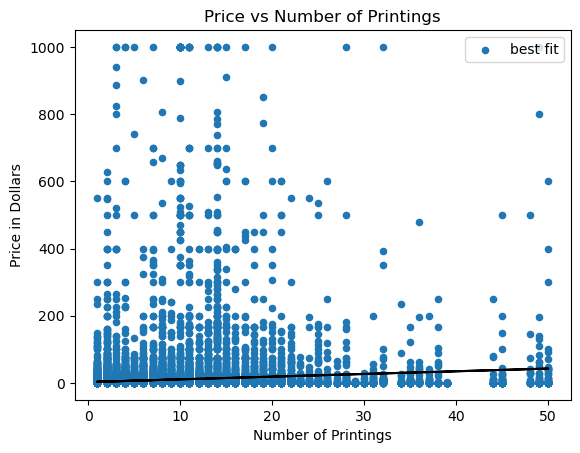

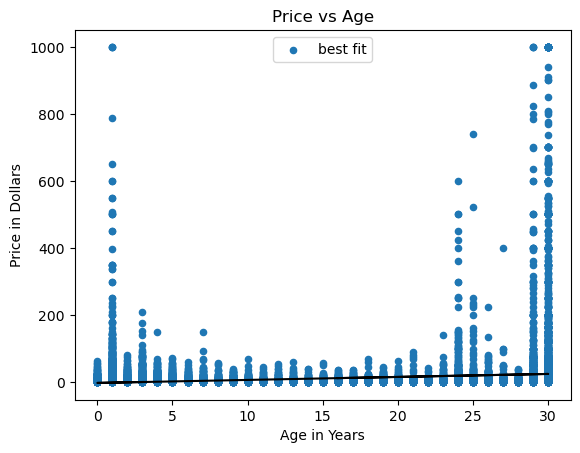

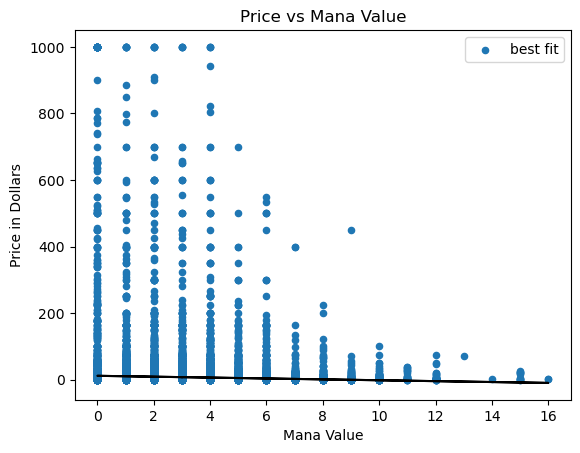

In [15]:
from datetime import date
# Excludes basic lands which have been in every set
dummy = combined[combined["num_printings"] < 150].copy()
dummy = dummy.dropna(subset=["num_printings", "nonfoil_price"])
ax1 = dummy.plot.scatter(x="num_printings", y="nonfoil_price")
f = np.polyfit(dummy["num_printings"], dummy["nonfoil_price"], 1)
print("Average increase in card price per printing is " + str(f[0]))
dummy['best_fit'] = (np.poly1d(f))(dummy["num_printings"])
dummy.plot.line(x="num_printings", y="best_fit", color="black", ax=ax1)
ax1.legend(['best fit'])
ax1.set_title("Price vs Number of Printings")
ax1.set_xlabel("Number of Printings")
ax1.set_ylabel("Price in Dollars")

dummy = combined.dropna(subset=["release_date", "nonfoil_price"]).copy()
dummy["age"] = dummy["release_date"].apply(lambda x: date.today().year - x.year)
ax2 = dummy.plot.scatter(x="age", y="nonfoil_price")
f = np.polyfit(dummy["age"], dummy["nonfoil_price"], 1)
print("Average increase in card price per year is " + str(f[0]))
dummy['best_fit'] = (np.poly1d(f))(dummy["age"])
dummy.plot.line(x="age", y="best_fit", color="black", ax=ax2)
ax2.legend(['best fit'])
ax2.set_title("Price vs Age")
ax2.set_xlabel("Age in Years")
ax2.set_ylabel("Price in Dollars")

dummy = combined.dropna(subset=["manaValue", "nonfoil_price"]).copy()
ax3 = dummy.plot.scatter(x="manaValue", y="nonfoil_price")
f = np.polyfit(dummy["manaValue"], dummy["nonfoil_price"], 1)
print("Average decrease in card price per mana is " + str(-1 * f[0]))
dummy['best_fit'] = (np.poly1d(f))(dummy["manaValue"])
dummy.plot.line(x="manaValue", y="best_fit", color="black", ax=ax3)
ax3.legend(['best fit'])
ax3.set_title("Price vs Mana Value")
ax3.set_xlabel("Mana Value")
ax3.set_ylabel("Price in Dollars")

<h2><center>Reflections on Number of Printings, Age, and Mana Value Graphs</center></h2>
<p>
&emsp;To start, let's look at the graph of Price vs Number of Printings. This graph yielded some very surprising results. According to the line of best fit generated by NumPy's polyfit function, as the number of printings increases, the price actually increases! This was totally bizarre to me when I first encountered these results. So, I began to think about the potential reasons for this trend. The best explanation I could come up with is that the cards which were most often reprinted were the cards that were also in high demand. This means that players really loved these cards, and so they were reprinted to meet that demand. So, even though there would be more supply, the demand for these cards must outpace the available supply causing the price to actually increase. 
</p>
<p>
&emsp;Next, we'll move on to the graph of Price vs Age. In this graph, the linear regression yielded the expected results. As age increased, price also tended to increase. However, the way the scatter plot appears, I'm suspicious that a quadratic regression may yield a better fit, as there appears to be a spike in the newest cards as well. This will be looked at in closer detail in the machine learning section.
</p>
<p>
&emsp;Lastly, there is the graph of Price vs Mana Value. The linear regression applied to this data also yielded expected results. As cards became more expensive mana value wise, their prices tended to decrease. This makes sense with my predictions made in the previous section.
</p>

<h2><center>Rarity, Foil, and Non-Foil Effects on Price</center></h2>
<p>
&emsp;To visualize the effect of Rarity, Foil, and Non-foil attributes on a card's Price, I decided to create a bar graph for this visualization. To process the data, I grouped the cards by their rarity and found the mean price for both foil and non-foil cards. When looking at common, uncommon, and rare cards I was surprised to see that on average non-foil cards outperform foil cards in terms of price point. It is only in the mythic category of rarity that foil cards outshined their non-foil counterparts. I'm not sure what would be the cause of this, but it is certainly a surprising discovery.
</p>

Text(0.5, 0, 'Rarity')

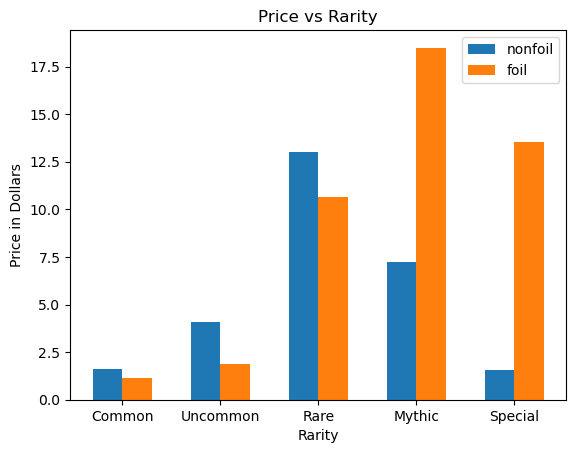

In [12]:
import matplotlib.pyplot as plt
dummy = combined.dropna(subset=["rarity", "nonfoil_price"]).copy()
bars = dummy.groupby('rarity')['nonfoil_price'].mean().reindex(index=['common', 'uncommon', 'rare', 'mythic', 'special']).values

dummy = combined.dropna(subset=["rarity", "foil_price"]).copy()
bars2 = dummy.groupby('rarity')['foil_price'].mean().reindex(index=['common', 'uncommon', 'rare', 'mythic', 'special']).values

ind = np.arange(5)
width = 0.3
plt.bar(ind-.15, bars, width, label="label")
plt.bar(ind + .15, bars2, width, label="label")
plt.xticks(ind, ('Common', 'Uncommon', 'Rare', 'Mythic', 'Special'))
plt.title("Price vs Rarity")
plt.legend(["nonfoil", "foil"])
plt.ylabel("Price in Dollars")
plt.xlabel("Rarity")

<h1><center>Machine Learning To Determine Important Features and Better Models</center></h1>
<h2><center>Determining Important Features</center></h2>
<p>
&emsp;In this section I use machine learning by using the statsmodels.formula.api module to determine the importance of feature values in determining price. In the below code, I use the formula "nonfoil_price ~ num_printings + age + manaValue + is_Artifact + is_Creature + is_Instant + is_Sorcery + is_Planeswalker + is_Land + is_Enchantment" to learn about these feature values.
</p>
<p>
&emsp;This formula uses Ordinary Least Squares to measure error when performing its regression. This regression will allow me to determine which of the feature values specified in the formula are actually significant and how they contribute to the model. Based off the p-values, I can say that the features "is_Planeswalker" and "is_Land" are not significant feature values because their p-values are greater than 0.05.
So now, I'll rerun this code with those features removed.
</p>

In [62]:
# Excludes basic lands which have been in every set
dummy = combined[combined["num_printings"] < 150].copy()
dummy = dummy.dropna(subset=["num_printings", "release_date", "manaValue", "nonfoil_price"])
dummy["age"] = dummy["release_date"].apply(lambda x: date.today().year - x.year)
reg = smf.ols(formula="nonfoil_price ~ num_printings + age + manaValue + is_Artifact + is_Creature + is_Instant + is_Sorcery + is_Planeswalker + is_Land + is_Enchantment", data=dummy).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          nonfoil_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     206.6
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        05:07:22   Log-Likelihood:            -2.2903e+05
No. Observations:               42994   AIC:                         4.581e+05
Df Residuals:                   42983   BIC:                         4.582e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<h2><center>Determining Important Features</center></h2>
<p>
&emsp;With those features removed, we now run the regression model once more on the remaining features to obtain the coefficients associated with these features. According to this regression, the features that positively impact a cards predicted value are being an Artifact, having more printings, being older, and being more mana efficient. This falls in line with the data exploration from the previous section concerning the features: number of printings, age, and mana value. Surprisingly, being a creature, instant, sorcery, and or enchantment card seems to drastically negatively impact a cards predicted price which is something I found to be unexpected.
</p>
<p>
&emsp;To make the visualization of these results more apparent, I also added a horizontal bar graph indicating the weights of the coefficients with their associated feature values.
</p>

In [25]:
# Excludes basic lands which have been in every set
dummy = combined[combined["num_printings"] < 150].copy()
dummy = dummy.dropna(subset=["num_printings", "release_date", "manaValue", "nonfoil_price"])
dummy["age"] = dummy["release_date"].apply(lambda x: date.today().year - x.year)
reg = smf.ols(formula="nonfoil_price ~ num_printings + age + manaValue + is_Artifact + is_Creature + is_Instant + is_Sorcery + is_Enchantment", data=dummy).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          nonfoil_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        22:22:36   Log-Likelihood:            -2.2903e+05
No. Observations:               42994   AIC:                         4.581e+05
Df Residuals:                   42985   BIC:                         4.582e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

<BarContainer object of 8 artists>

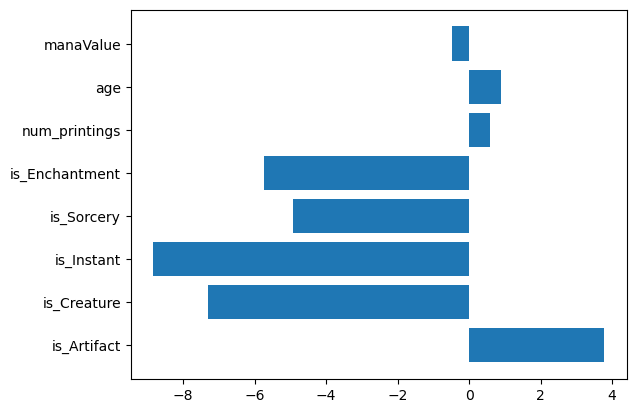

In [26]:
plt.barh(y=["is_Artifact", "is_Creature", "is_Instant", "is_Sorcery", "is_Enchantment", "num_printings", "age", "manaValue"], width=reg.params.values[1:])

<h2><center>Quadratic of Linear, What was the Better Fit?</center></h2>
<p>
&emsp;In the previous section, when we created the graph of a Price vs Age and ran linear regression, we had speculated that this model could be improved if we used a quadratic regression instead, and to go even further than that we will run a biquadratic regression as well. To test this theory, I have applied a more traditional method of machine learning to determine if a higher degree model would indeed create a better prediction. 
</p>
<p>
&emsp;In order to accomplish this task, I took the entire set of data and shuffled it with the sample method. Then I divided the data into roughly two even sets. The first set contains 22,000 entries and will be used to train the models, and the second set contains 22,874 entries and will be used to test the accuracy of the models. To apply linear, quadratic, and biquadratic regression, I used NumPy's polyfit function with the training dataset specifying the highest degree of the polynomial used (1, 2, and 4 respectively).
</p>
<p>
&emsp;Now to measure how well each model predicted the price, I took the predicted price according to the model and subtracted it from the actual price according to the test dataset and squared the result. I then summed all of the errors. This is the ordinary least squares method of calculating error. According to these calculations, the quadratic equation reduced error by about 5% and the biquadratic equation reduced error by about 10%. This shows that higher degree polynomials are indeed better fits for this regression than the linear regression we had done in the previous section.
</p>

Size of training dataset 22000
Size of test dataset 22874
The total error according to ordinary least squares for the linear model is 50124296.107978046
The total error according to ordinary least squares for the quadratic model is 47824886.31680203
The total error according to ordinary least squares for the biquadratic model is 45275179.60827533
The quadrtaic model had 0.04587415624196722 less error.
The Biquadrtaic model had 0.09674183731691155 less error.


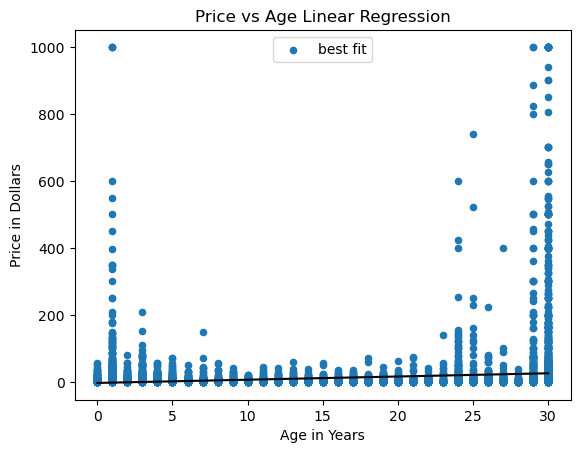

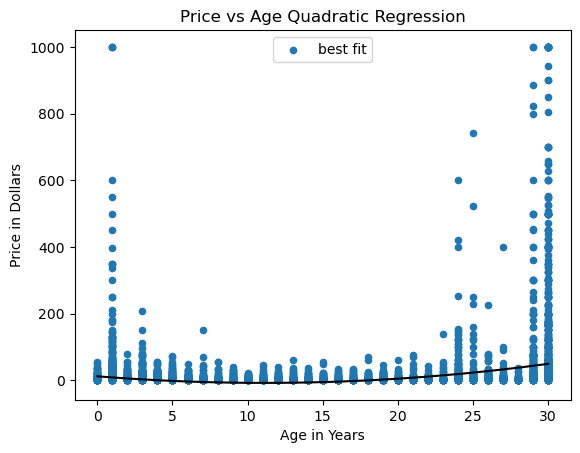

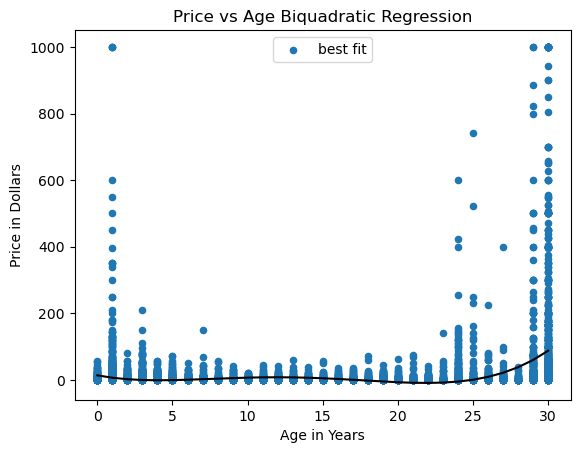

In [61]:
dummy = combined.dropna(subset=["release_date", "nonfoil_price"]).copy()
dummy["age"] = dummy["release_date"].apply(lambda x: date.today().year - x.year)
# shuffle the data
# Take about half as the training data and about half as the testing data
dummy_shuffled = dummy.sample(frac=1)
dummy_train = dummy_shuffled.iloc[0:22000,:].copy()
print("Size of training dataset " + str(len(dummy_train.index)))
dummy_test  = dummy_shuffled.iloc[22000:,:].copy()
# order this to make the quadratic graph draw a nice smooth line
dummy_test = dummy_test.sort_values(by="age")
print("Size of test dataset " + str(len(dummy_test.index)))

# Linear Regression
ax2 = dummy_test.plot.scatter(x="age", y="nonfoil_price")
# Run the regression on only the training dataset
f = np.polyfit(dummy_train["age"], dummy_train["nonfoil_price"], 1)
# Graph the results of that model on the test data
dummy_test['best_fit'] = (np.poly1d(f))(dummy_test["age"])
dummy_test.plot.line(x="age", y="best_fit", color="black", ax=ax2)
ax2.legend(['best fit'])
ax2.set_title("Price vs Age Linear Regression")
ax2.set_xlabel("Age in Years")
ax2.set_ylabel("Price in Dollars")

# Compare predicted price to actual price using ordinary least squares
total_error_1 = 0
for index, row in dummy_test.iterrows():
    total_error_1 += (row["best_fit"] - row["nonfoil_price"])**2
print("The total error according to ordinary least squares for the linear model is " + str(total_error_1))

# Quadratic regression
ax3 = dummy_test.plot.scatter(x="age", y="nonfoil_price")
# Run the regression on only the training dataset
f = np.polyfit(dummy_train["age"], dummy_train["nonfoil_price"], 2)
# Graph the results of that model on the test data
dummy_test['best_fit'] = (np.poly1d(f))(dummy_test["age"])
dummy_test.plot.line(x="age", y="best_fit", color="black", ax=ax3)
ax3.legend(['best fit'])
ax3.set_title("Price vs Age Quadratic Regression")
ax3.set_xlabel("Age in Years")
ax3.set_ylabel("Price in Dollars")

# Compare predicted price to actual price using ordinary least squares
total_error_2 = 0
for index, row in dummy_test.iterrows():
    total_error_2 += (row["best_fit"] - row["nonfoil_price"])**2
print("The total error according to ordinary least squares for the quadratic model is " + str(total_error_2))

# Biquadratic regression
ax4 = dummy_test.plot.scatter(x="age", y="nonfoil_price")
# Run the regression on only the training dataset
f = np.polyfit(dummy_train["age"], dummy_train["nonfoil_price"], 4)
# Graph the results of that model on the test data
dummy_test['best_fit'] = (np.poly1d(f))(dummy_test["age"])
dummy_test.plot.line(x="age", y="best_fit", color="black", ax=ax4)
ax4.legend(['best fit'])
ax4.set_title("Price vs Age Biquadratic Regression")
ax4.set_xlabel("Age in Years")
ax4.set_ylabel("Price in Dollars")

# Compare predicted price to actual price using ordinary least squares
total_error_3 = 0
for index, row in dummy_test.iterrows():
    total_error_3 += (row["best_fit"] - row["nonfoil_price"])**2
print("The total error according to ordinary least squares for the biquadratic model is " + str(total_error_3))

print("The quadrtaic model had " + str(1 - (total_error_2 / total_error_1)) + " less error.")
print("The Biquadrtaic model had " + str(1 - (total_error_3 / total_error_1)) + " less error.")

<h1><center>Insights and Lessons Learned</center></h1>
<h2><center>Insights Into the Game and Financial Side of Magic the Gathering</center></h2>
<p>
&emsp;According to the analysis done throughout this project, we have learned that there is indeed some truth behind the color pie of Magic the Gathering. However, the reality is that in terms of a creature's stats, all creatures regardless of color scale very similarly. This is somewhat understandable. In order to create a fun and interactive game, you would not want one color to be the clear victor over all other colors. Some of the things that were not analyzed in this project, but could be interesting in a future analysis are card's keywords.
</p>
<p>
&emsp;For example, white creatures often have the keyword "vigilance", meaning that they can attack and block in the same turn cycle. Red creatures often have the keyword "haste", meaning that they can attack the turn they were summoned. Other colors tend to have associated keywords as well, and it would be interesting to pair these keywords up with their colors for a further analysis of the color pie. But this will be saved for future work.
</p>
<p>
&emsp;On the financial side of MTG, we confirmed and disillusioned ourselves to some of our beliefs. We discovered that the age of a card is positively correlated to its price and that a cards mana value is negatively correlated to its price as expected. However, I was shocked to discover the number of printings for a card is positively correlated to its price. This was somewhat counterintuitive, but I believe that a cards printings is related to its popularity/demand and therefore the number of printings is actually a better indicator of its high demand and thus high price.
</p>
<h2><center>Insights Into the World of Data Science</center></h2>
<p>
&emsp;This project has shown the complete lifecycle of a data science project. We began with the collection and cleaning of our data, performed data visualization and hypothesis testing, and lastly we applied some principles of machine learning to create predictive models for our topic. This has shown how powerful a tool data science can be. The financial side of MTG has some direct similarities to the stock market where a vast amount of resources have been dedicated to creating predictive models for efficient trades. In the world of MTG the stakes are far less severe, and this offers a window into how analysis on the stock exchange may be conducted. In a world with a sea of data, it is up to data scientists to capture this information and transform it into something others can understand. This simple project was just a peek into the world of data science. Even with a topic as mundane as trading cards, we were able to extract some amazing insights, and this could be done with many other topics around the world that we wish to have a better understanding of.
</p>